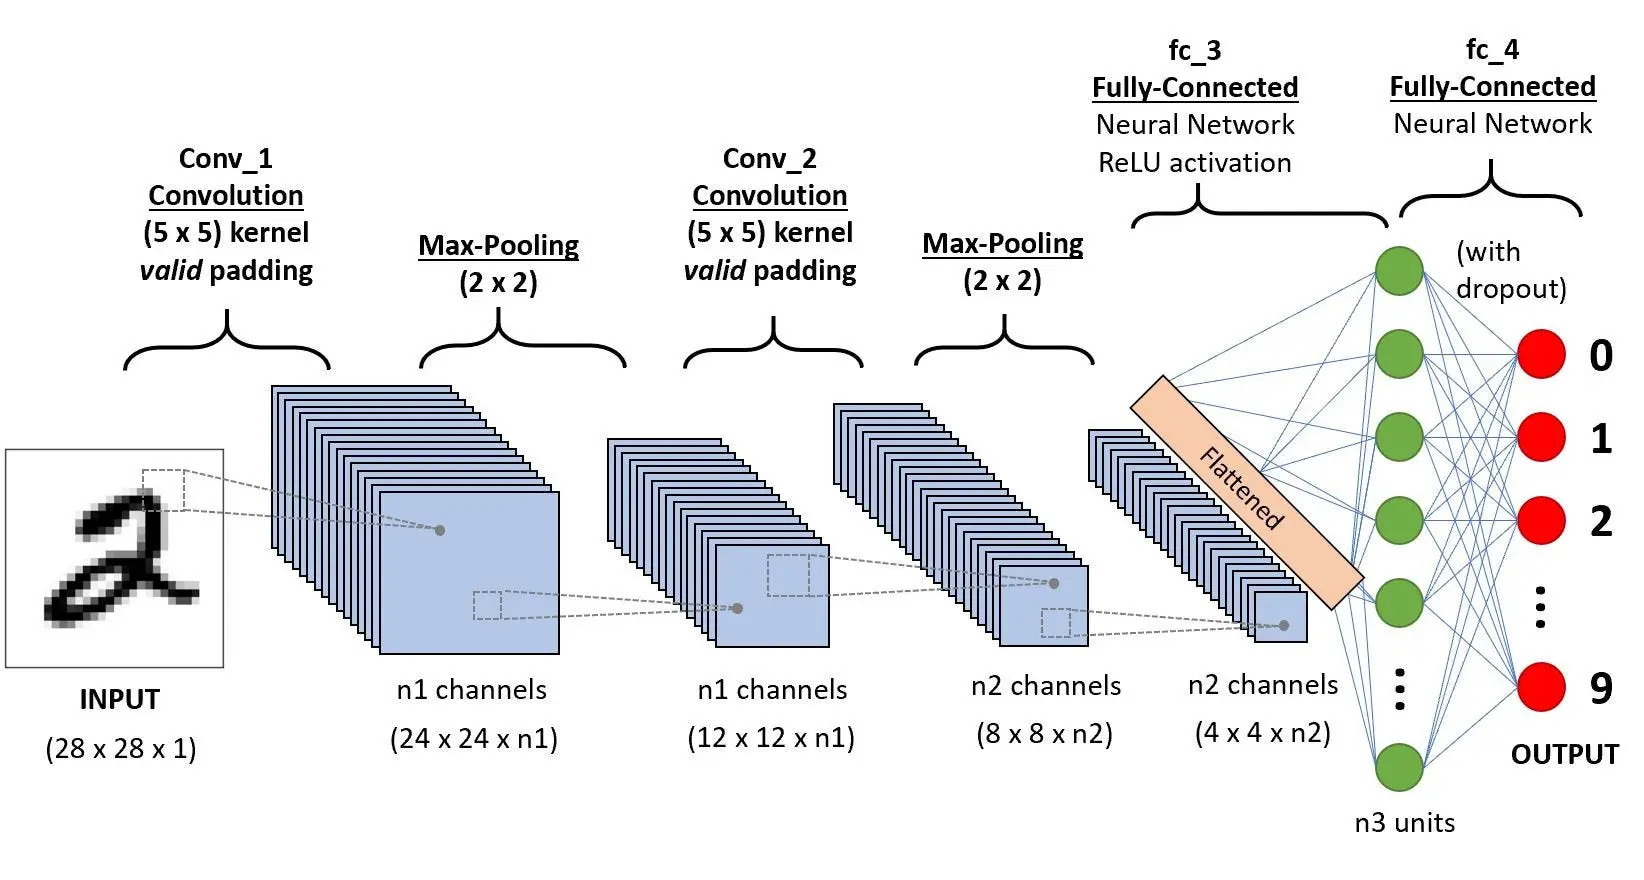

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [4]:
# Loading the Dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Normalising Images -
 Dividing each pixel value by 255 to scale its value between 0 and 1
 -  as Large Values Cause Unstable gradients during Training.
 - Scaling can Help the model to learn faster and more efficiently
 - Also Scaling the Pixel Values keeps the Gradient smooth, preventing from exploding and vanishing gradients.

In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0

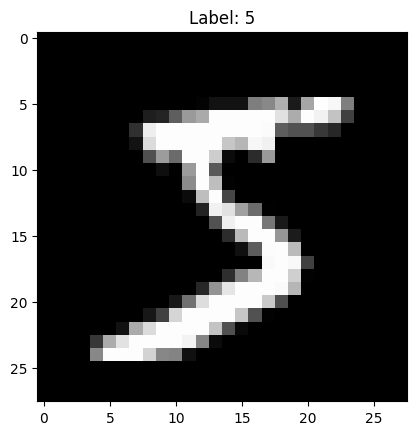

In [8]:
# Checking for the First image
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

### Building First CNN Model

here we are going to setup our first convolutional model layers.

- **first layer:** It is an conolutional Layer, with 32 filters each filter is of size 3*3 with 1 channel each. Also Since there are 32 to filters each filter will detect different feature maps, i.e. a total of 32 feature maps(each detecting different Patterns) for each input(28,28,1) . So the shape of the Output from first layer will be (26,26,32).   {The size shrinks 28->26 due to valid Convolutions here (means no padding). and the depth Increased from 1->32(as 32 total filters)}

- **Max-Pooling :** Performs Doownsampling by taking the maximum value in each 2x2 region. Doing this reduces the Image size(nH or nW) by half while keeping the imp features.

- **Second Covolution Layer :** This Convolution layer consist of 64 filters instead of 32, as this layer extracts more complex features from the image, this layer also uses ReLU function.

- **Seconf Max-Pooling layer:** halves the size of the image again.

- **Flattenning Layer :** converts 2D feature map into 1D array, as Fully connected layer (coming next) requires 1D arrays.

- **First Dense layer :** Adds64 nuerons that learn High_level patterns from the extracted features (uses ReLU function for non-linearity).

- **OutputLayer :** Again uses .dense, uses Softmax function in the  final stage to classify probabilities of the result.



In [18]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)), # First Convolutional Layer
    layers.MaxPooling2D((2,2)), # First Max-Pooling layer

    layers.Conv2D(64, (3,3), activation='relu'), # Second Convolution Layers
    layers.MaxPooling2D((2,2)), # Second maxPooling Layer

    layers.Flatten(), # Flattening 2D into 1D
    layers.Dense(128, activation='relu'), # Ful;y connected Layer
    layers.Dense(10, activation='softmax'), #final layer/outputLayer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Training The model

In [20]:
# Training The model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.9113 - loss: 0.2920 - val_accuracy: 0.9841 - val_loss: 0.0485
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9860 - loss: 0.0457 - val_accuracy: 0.9843 - val_loss: 0.0447
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9913 - loss: 0.0288 - val_accuracy: 0.9890 - val_loss: 0.0340
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9931 - loss: 0.0210 - val_accuracy: 0.9873 - val_loss: 0.0373
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9955 - loss: 0.0142 - val_accuracy: 0.9905 - val_loss: 0.0279
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9961 - loss: 0.0118 - val_accuracy: 0.9906 - val_loss: 0.0301
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 31ms/step - accuracy: 0.9970 - loss: 0.0093 - val_accuracy: 0.9914 - val_loss: 0.0279
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9978 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9847 - loss: 0.0747
Test Accuracy: 98.79%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


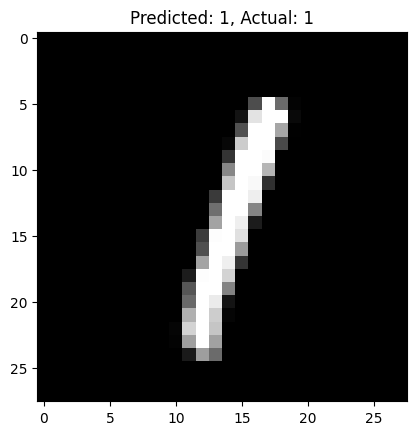

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Predict on a single image
import numpy as np
prediction = np.argmax(model.predict(test_images[5].reshape(1,28,28,1)))
plt.imshow(test_images[5], cmap='gray')
plt.title(f"Predicted: {prediction}, Actual: {test_labels[5]}")
plt.show()
